<a href="https://colab.research.google.com/github/DataPrincess-5418/DPWS_Lab_1/blob/main/Lab1_tensor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch



![](https://drive.google.com/uc?export=view&id=16RkZ3DI24IUW-cgBf9VwBV6qFOCPN1DE)


Get Device for Training
-----------------------
Click "Edit" and select "Notebook Settings", change to GPU.

We want to be able to train our model on a hardware accelerator like the GPU,
if it is available. Let's check to see if
`torch.cuda <https://pytorch.org/docs/stable/notes/cuda.html>`_ is available, else we
continue to use the CPU.


In [2]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


# Tensors

![](https://drive.google.com/uc?export=view&id=16B77DGXlQI9MdM4I3oBU2rDmUf-fu0Qa)

Tensors are a specialized data structure that are very similar to arrays and matrices.
In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.

Tensors are similar to `NumPy’s <https://numpy.org/>`_ ndarrays, except that tensors can run on GPUs or other hardware accelerators. In fact, tensors and
NumPy arrays can often share the same underlying memory, eliminating the need to copy data (see `bridge-to-np-label`). Tensors
are also optimized for automatic differentiation (we'll see more about that later in the `Autograd <autogradqs_tutorial.html>`__
section). If you’re familiar with ndarrays, you’ll be right at home with the Tensor API. If not, follow along!



In [3]:
import torch
import numpy as np

Initializing a Tensor
~~~~~~~~~~~~~~~~~~~~~

Tensors can be initialized in various ways. Take a look at the following examples:

**Directly from data**

Tensors can be created directly from data. The data type is automatically inferred.



In [4]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)

**From a NumPy array**

Tensors can be created from NumPy arrays (and vice versa - see `bridge-to-np-label`).



In [5]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

**From another tensor:**

The new tensor retains the properties (shape, datatype) of the argument tensor, unless explicitly overridden.



In [6]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.3671, 0.1865],
        [0.6826, 0.4858]]) 



**With random or constant values:**

``shape`` is a tuple of tensor dimensions. In the functions below, it determines the dimensionality of the output tensor.



In [11]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.8449, 0.3446, 0.5321],
        [0.4878, 0.8343, 0.2087]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


--------------




Attributes of a Tensor
~~~~~~~~~~~~~~~~~

Tensor attributes describe their shape, datatype, and the device on which they are stored.



In [12]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


--------------




Operations on Tensors
~~~~~~~~~~~~~~~~~

Over 100 tensor operations, including arithmetic, linear algebra, matrix manipulation (transposing,
indexing, slicing), sampling and more are
comprehensively described `here <https://pytorch.org/docs/stable/torch.html>`__.

Each of these operations can be run on the GPU (at typically higher speeds than on a
CPU). If you’re using Colab, allocate a GPU by going to Runtime > Change runtime type > GPU.

By default, tensors are created on the CPU. We need to explicitly move tensors to the GPU using
``.to`` method (after checking for GPU availability). Keep in mind that copying large tensors
across devices can be expensive in terms of time and memory!



In [9]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
    tensor = tensor.to("cuda")

Try out some of the operations from the list.
If you're familiar with the NumPy API, you'll find the Tensor API a breeze to use.




**Standard numpy-like indexing and slicing:**



In [ ]:
tensor = torch.ones(4, 4)
print(f"First row: {tensor[0]}") 
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")

# Question: change row 1 column 2 to zero, and print it out
# Question: change column 3 to zero, and print it out


First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])


**Joining tensors** You can use ``torch.cat`` to concatenate a sequence of tensors along a given dimension.
See also `torch.stack <https://pytorch.org/docs/stable/generated/torch.stack.html>`__,
another tensor joining op that is subtly different from ``torch.cat``.



In [ ]:
t1 = torch.cat([tensor, tensor, tensor], dim=1) # Question: try dim = 0
print(t1)

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])


**Arithmetic operations**



![multiplication](https://drive.google.com/uc?export=view&id=16PwtAc8eZdLhdSpGiyc4BmwYKwujB0rE)

In [ ]:
# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
tensor = torch.ones(3,3)
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(tensor)
torch.matmul(tensor, tensor.T, out=y3)


# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]])
tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]])


tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

# Question, do the following calculation

Create two tensors:
A = [1, 2; 
     3, 4]

B = [1, 2, 3;
     4, 5, 6]

1. Calculate and print the matrix multiplication of A, B
2. Calculate and print the element-wise product of A, B

In [ ]:
#----------Start coding here---------------



# Work in groups, calculate the perceptron

![perceptron](https://drive.google.com/uc?export=view&id=17y3sEq2liPukxiJcUVk7rNTRHo8akS-N)

In [ ]:
#----------Start coding here---------------

X = torch.tensor([[1, 2],[3, 4], [5, 6]], dtype=torch.float32)
W = torch.tensor([[0.16, 0.24, 0.98], [0.72, 0.11, 0.35]], dtype=torch.float32)
b = torch.tensor([[2],[3]])

shape = (2,2,)
Z = torch.rand(shape, dtype=torch.float32)
a = torch.zeros(shape, dtype=torch.float32)

Z = b + W.matmul(X)
print(W.matmul(X))
print(Z)

a = 1/(1+torch.exp(Z))
print(a)

tensor([[5.7800, 7.1600],
        [2.8000, 3.9800]])
tensor([[7.7800, 9.1600],
        [5.8000, 6.9800]])
tensor([[0.0004, 0.0001],
        [0.0030, 0.0009]])


**Single-element tensors** If you have a one-element tensor, for example by aggregating all
values of a tensor into one value, you can convert it to a Python
numerical value using ``item()``:



In [ ]:
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

12.0 <class 'float'>


**In-place operations**
Operations that store the result into the operand are called in-place. They are denoted by a ``_`` suffix.
For example: ``x.copy_(y)``, ``x.t_()``, will change ``x``.



In [ ]:
print(f"{tensor} \n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


<div class="alert alert-info"><h4>Note</h4><p>In-place operations save some memory, but can be problematic when computing derivatives because of an immediate loss
     of history. Hence, their use is discouraged.</p></div>

An in-place operation is an operation that changes directly the content of a given Tensor without making a copy. Inplace operations in pytorch are always postfixed with a _, like .add_() or .scatter_(). Python operations like += or *= are also inplace operations.


--------------





Bridge with NumPy
~~~~~~~~~~~~~~~~~
Tensors on the CPU and NumPy arrays can share their underlying memory
locations, and changing one will change	the other.



Tensor to NumPy array
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^



In [ ]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


A change in the tensor reflects in the NumPy array.



In [ ]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


NumPy array to Tensor
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^



In [ ]:
n = np.ones(5)
t = torch.from_numpy(n)

Changes in the NumPy array reflects in the tensor.



In [ ]:
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


# Work in groups, rewrite the following code using tensor


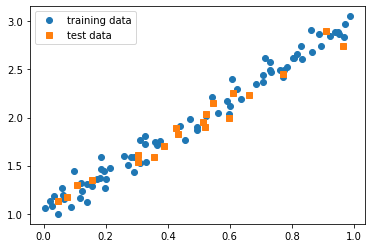

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#---------Please revise here-----------------------
# Data Generation
np.random.seed(42) # what is the equivalent function in tensor?
x = np.random.rand(100, 1) # what is the equivalent function in tensor?
y = 1 + 2 * x + .1 * np.random.randn(100, 1)

# Shuffles the indices
idx = np.arange(100) # what is the equivalent function in tensor?
np.random.shuffle(idx) # what is the equivalent function in tensor?
#--------------------------------------------------

# Uses first 80 random indices for train
train_idx = idx[:80]
# Uses the remaining indices for validation
val_idx = idx[80:]

# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

# plot the train and test data
plt.plot(x_train, y_train,'o', label='training data')
plt.plot(x_val, y_val,'s', label='test data')
plt.legend()
plt.show()

# Datasets & DataLoaders


Code for processing data samples can get messy and hard to maintain; we ideally want our dataset code
to be decoupled from our model training code for better readability and modularity.
PyTorch provides two data primitives: ``torch.utils.data.DataLoader`` and ``torch.utils.data.Dataset``
that allow you to use pre-loaded datasets as well as your own data.
``Dataset`` stores the samples and their corresponding labels, and ``DataLoader`` wraps an iterable around
the ``Dataset`` to enable easy access to the samples.

PyTorch domain libraries provide a number of pre-loaded datasets (such as FashionMNIST) that
subclass ``torch.utils.data.Dataset`` and implement functions specific to the particular data.
They can be used to prototype and benchmark your model. You can find them
here: `Image Datasets <https://pytorch.org/vision/stable/datasets.html>`_,
`Text Datasets  <https://pytorch.org/text/stable/datasets.html>`_, and
`Audio Datasets <https://pytorch.org/audio/stable/datasets.html>`_




Loading a Dataset
-------------------

Here is an example of how to load the `Fashion-MNIST <https://research.zalando.com/project/fashion_mnist/fashion_mnist/>`_ dataset from TorchVision.
Fashion-MNIST is a dataset of Zalando’s article images consisting of 60,000 training examples and 10,000 test examples.
Each example comprises a 28×28 grayscale image and an associated label from one of 10 classes.

We load the `FashionMNIST Dataset <https://pytorch.org/vision/stable/datasets.html#fashion-mnist>`_ with the following parameters:
 - ``root`` is the path where the train/test data is stored,
 - ``train`` specifies training or test dataset,
 - ``download=True`` downloads the data from the internet if it's not available at ``root``.
 - ``transform`` and ``target_transform`` specify the feature and label transformations



In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

Iterating and Visualizing the Dataset
-----------------

We can index ``Datasets`` manually like a list: ``training_data[index]``.
We use ``matplotlib`` to visualize some samples in our training data.



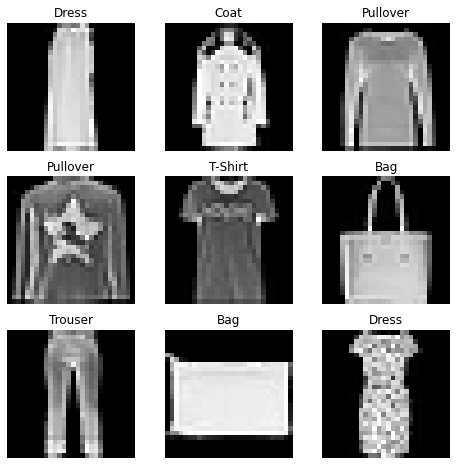

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

..
 .. figure:: /_static/img/basics/fashion_mnist.png
   :alt: fashion_mnist



Creating a Custom Dataset for your files
---------------------------------------------------

A custom Dataset class must implement three functions: `__init__`, `__len__`, and `__getitem__`.
Take a look at this implementation; the FashionMNIST images are stored
in a directory ``img_dir``, and their labels are stored separately in a CSV file ``annotations_file``.

In the next sections, we'll break down what's happening in each of these functions.



**Class and Object example**

![](https://drive.google.com/uc?export=view&id=16tJqGYorMcj49w0z-3LZSoep0Y9-NUmw)

In [ ]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

__init__
^^^^^^^^^^^^^^^^^^^^

The __init__ function is run once when instantiating the Dataset object. We initialize
the directory containing the images, the annotations file, and both transforms (covered
in more detail in the next section).

The labels.csv file looks like: ::

    tshirt1.jpg, 0
    tshirt2.jpg, 0
    ......
    ankleboot999.jpg, 9



In [ ]:
def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

__len__
^^^^^^^^^^^^^^^^^^^^

The __len__ function returns the number of samples in our dataset.

Example:



In [ ]:
def __len__(self):
    return len(self.img_labels)

__getitem__
^^^^^^^^^^^^^^^^^^^^

The __getitem__ function loads and returns a sample from the dataset at the given index ``idx``.
Based on the index, it identifies the image's location on disk, converts that to a tensor using ``read_image``, retrieves the
corresponding label from the csv data in ``self.img_labels``, calls the transform functions on them (if applicable), and returns the
tensor image and corresponding label in a tuple.



In [ ]:
def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
        image = self.transform(image)
    if self.target_transform:
        label = self.target_transform(label)
    return image, label

--------------




Preparing your data for training with DataLoaders
-------------------------------------------------
The ``Dataset`` retrieves our dataset's features and labels one sample at a time. While training a model, we typically want to
pass samples in "minibatches", reshuffle the data at every epoch to reduce model overfitting, and use Python's ``multiprocessing`` to
speed up data retrieval.

``DataLoader`` is an iterable that abstracts this complexity for us in an easy API.



![](https://drive.google.com/uc?export=view&id=176XUSOUFd0Ogmyt6JvUX1DjNLfJHfpRa)

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Iterate through the DataLoader
--------------------------

We have loaded that dataset into the ``DataLoader`` and can iterate through the dataset as needed.
Each iteration below returns a batch of ``train_features`` and ``train_labels`` (containing ``batch_size=64`` features and labels respectively).
Because we specified ``shuffle=True``, after we iterate over all batches the data is shuffled (for finer-grained control over
the data loading order, take a look at `Samplers <https://pytorch.org/docs/stable/data.html#data-loading-order-and-sampler>`_).



Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


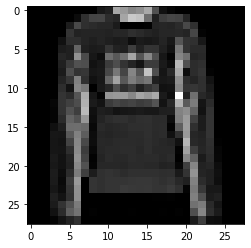

Label: 2


In [ ]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

--------------




Further Reading
--------------
- `torch.utils.data API <https://pytorch.org/docs/stable/data.html>`_



Transforms
===================

Data does not always come in its final processed form that is required for
training machine learning algorithms. We use **transforms** to perform some
manipulation of the data and make it suitable for training.

All TorchVision datasets have two parameters -``transform`` to modify the features and
``target_transform`` to modify the labels - that accept callables containing the transformation logic.
The `torchvision.transforms <https://pytorch.org/vision/stable/transforms.html>`_ module offers
several commonly-used transforms out of the box.

The FashionMNIST features are in PIL Image format, and the labels are integers.
For training, we need the features as normalized tensors, and the labels as one-hot encoded tensors.
To make these transformations, we use ``ToTensor`` and ``Lambda``.


In [ ]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

ToTensor()
-------------------------------

`ToTensor <https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.ToTensor>`_
converts a PIL image or NumPy ``ndarray`` into a ``FloatTensor``. and scales
the image's pixel intensity values in the range [0., 1.]




Lambda Transforms
-------------------------------

Lambda transforms apply any user-defined lambda function. Here, we define a function
to turn the integer into a one-hot encoded tensor.
It first creates a zero tensor of size 10 (the number of labels in our dataset) and calls
`scatter_ <https://pytorch.org/docs/stable/generated/torch.Tensor.scatter_.html>`_ which assigns a
``value=1`` on the index as given by the label ``y``.



In [ ]:
target_transform = Lambda(lambda y: torch.zeros(
    10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))

Further Reading
~~~~~~~~~~~~~~~~~
- `torchvision.transforms API <https://pytorch.org/vision/stable/transforms.html>`_

